In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
gisp_d15N = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/GISP2/CH4, d18O, d15N-N2, and Ca.xlsx', sheet_name=11, skiprows=30, usecols=[0,1,2], names=['depth', 'gicc05 age', 'd15n'])
alley_temp = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/GISP2/GISP_Alley_Temp.txt', sep='\t', comment='#')

gisp_d15N['interp_temp'] = np.interp(gisp_d15N['gicc05 age']/1000, alley_temp['age_calkaBP'], alley_temp['Temperature'])

In [22]:
gisp_d15N

,depth,gicc05 age,d15n,interp_temp
0,82.37,64.88,0.31167,-31.591300
1,85.35,75.88,0.31326,-31.591300
2,89.69,92.84,0.30793,-31.591300
3,90.21,94.87,0.31066,-31.591300
4,94.44,111.68,0.30652,-31.607335
...,...,...,...,...
1017,2682.05,85153.67,0.43010,-39.969400
1018,2682.25,85188.14,0.42093,-39.969400
1019,2682.65,85258.73,0.41522,-39.969400
1020,2683.15,85349.81,0.42154,-39.969400


In [ ]:
R = 8.314462
T1 = gisp_d15N['interp_temp'] + 273.15
T2 = -30 + 273.15
g = 9.80665
delta_m = 0.000997

step_1 = (R * T1) / (delta_m * g) 
step_2 = np.log(1+(gisp_d15N['d15n']/1000))

DCH = step_1 * step_2
Convec_zone = 2 #guess

gisp_d15N['LID'] = DCH + Convec_zone


In [29]:
R = 8.314462
T1 = gisp_d15N['interp_temp'] + 273.15
T2 = -30 + 273.15
g = 9.80665
delta_m = 0.000997

step_1 = (R * T2) / (delta_m * g) 
step_2 = np.log(1+(gisp_d15N['d15n']/1000))

DCH = step_1 * step_2
Convec_zone = 2 #guess

gisp_d15N['LID2'] = DCH + Convec_zone

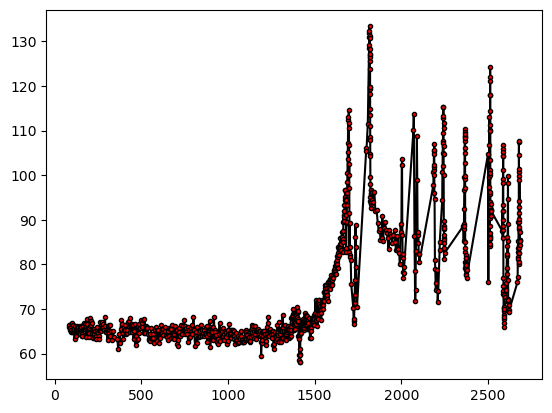

In [36]:
plt.plot(gisp_d15N['depth'], gisp_d15N['LID'], color='k', marker='o', ms=3, mfc='red')

#plt.plot(gisp_d15N['depth'], gisp_d15N['LID2'], color='b', marker='o', ms=3, mfc='red')

In [40]:
gisp_d15N

export = gisp_d15N[['depth', 'LID']]

export['rel_unc'] = 0.15
export['comment'] = np.nan

/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_6241/1203688591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export['rel_unc'] = 0.15
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_6241/1203688591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export['comment'] = np.nan


In [42]:
export.to_csv('/Users/quinnmackay/Desktop/temp/lid.txt', sep='\t', index=False)